###  데이타 분석

데이타 -> 필터링 -> 정제 -> 시각화 -> 분석


### 데이타 필터링

분석에 필요한 데이타를 거르는 작업

# 고속버스 데이타셋에서 인사이트를 도출

[예] 

1. 우승고속에 대한 데이타 필터링(추출)

2. 경부선에서 총이용인원이 1000명 이상인 데이타 필터링(추출)

3. 그 외 데이타를 찾아내시오

In [64]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 
       # sheetname='highway'  encoding='cp949' 추가 안해도 실행  
df.head()  # 상위 5개만 보임

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1


[연습]

In [65]:
# 이용율 살펴보기
df['이용율'].describe()

count    351.000000
mean      52.118803
std       38.423247
min        4.600000
25%       37.650000
50%       48.700000
75%       59.950000
max      588.900000
Name: 이용율, dtype: float64

In [66]:
# 이용율 백분위수 비교

df_tmp = df[df['이용율'] < 37.65].sort_values(by="이용율") # 이용율 하위 25%
df_tmp.head()

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
269,우등,호남선,서울호남,삼호,365.4,79,162,4.6
268,고속,호남선,서울호남,삼호,365.4,18,38,7.5
81,고속,경부선,철산,천안,110.9,564,2425,9.6
3,고속,88선,광주,울산신복,327.8,70,311,9.9
67,고속,경부선,인천,아산온양,120.1,379,1737,10.2


#### 이용율 백분위수에 따른 노선 수익지표 등급화 <BR>
    
> 이용율 상위 25% => 'A' , 25~50 => 'B' , 50~75 => 'C' , 75~100 => 'D'로 등급을 세분화

In [79]:
# 등급 세분화 함수
def func(x):
    if x >= 59.95:
        cate='A'
    elif x >= 48.7:
        cate='B'
    elif x >= 37.65:
        cate='C'
    else:
        cate='D'
    return cate

In [68]:
df['이용율'] = df['이용율'].apply(func)

In [69]:
df['이용율'].astype('category')

0      A
1      C
2      D
3      D
4      B
5      C
6      C
7      B
8      A
9      D
10     C
11     B
12     C
13     D
14     B
15     C
16     B
17     B
18     A
19     C
20     B
21     A
22     A
23     A
24     A
25     A
26     B
27     B
28     B
29     C
      ..
321    B
322    C
323    D
324    A
325    C
326    C
327    C
328    D
329    B
330    C
331    D
332    D
333    D
334    A
335    D
336    B
337    C
338    B
339    D
340    C
341    C
342    D
343    C
344    A
345    B
346    C
347    B
348    A
349    A
350    D
Name: 이용율, Length: 351, dtype: category
Categories (4, object): [A, B, C, D]

In [70]:
df_res = df.groupby(df['이용율']).size()
df_res

이용율
A    88
B    88
C    87
D    88
dtype: int64

In [71]:
df_A = df[df['이용율'] == 'A']

In [73]:
df_res1 = df_A.groupby(df_A['차종']).size()
df_res1

차종
고속    45
우등    43
dtype: int64

In [80]:
df_D = df[df['이용율'] == 'D']

In [81]:
df_res2 = df_D.groupby(df_D['차종']).size()
df_res2

차종
고속    54
우등    34
dtype: int64

## 분석 결과 <br>

> 이용율 등급간 차종 비교결과, A등급의 경우 전체 88개의 데이터 중 고속버스가 45건으로 우등버스에 비해 2건 더 많음

> D등급의 경우 전체 88개의 데이터 중 우등버스가 49건으로 20건 더 많음

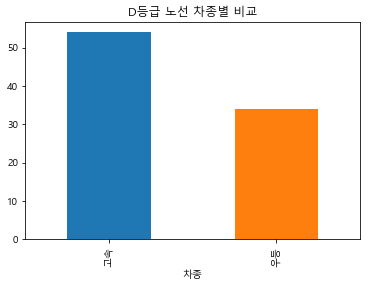

In [93]:
from matplotlib import rc

rc('font',family='Malgun Gothic')

df_res2.plot(kind='bar',title="D등급 노선 차종별 비교")